<a href="https://colab.research.google.com/github/DaliaEl-Sayed/DEPI---Generative-AI-Track-Tasks./blob/main/OpenCV_CAT_Images_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install opencv-python


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [51]:
print(cv2.__version__)

4.8.0


In [52]:
#cat image 1
!wget  https://th.bing.com/th/id/OIP.wOIYcd3giZ-DTkfzFugylwHaH6?w=2070&h=2211&rs=1&pid=ImgDetMain

#cat image 2
!wget  https://th.bing.com/th/id/OIP.A9TwI-qqX5QGTRwlSq5DUwAAAA?w=456&h=550&rs=1&pid=ImgDetMain


--2024-06-27 16:31:06--  https://th.bing.com/th/id/OIP.wOIYcd3giZ-DTkfzFugylwHaH6?w=2070
Resolving th.bing.com (th.bing.com)... 95.100.97.10, 95.100.96.3, 95.100.96.16, ...
Connecting to th.bing.com (th.bing.com)|95.100.97.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111670 (109K) [image/jpeg]
Saving to: ‘OIP.wOIYcd3giZ-DTkfzFugylwHaH6?w=2070.3’

OIP.wOIYcd3giZ-DTkf 100%[===================>] 109.05K  --.-KB/s    in 0.01s   

2024-06-27 16:31:06 (8.85 MB/s) - ‘OIP.wOIYcd3giZ-DTkfzFugylwHaH6?w=2070.3’ saved [111670/111670]

--2024-06-27 16:31:06--  https://th.bing.com/th/id/OIP.A9TwI-qqX5QGTRwlSq5DUwAAAA?w=456
Resolving th.bing.com (th.bing.com)... 95.100.97.10, 95.100.96.3, 95.100.96.16, ...
Connecting to th.bing.com (th.bing.com)|95.100.97.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34864 (34K) [image/jpeg]
Saving to: ‘OIP.A9TwI-qqX5QGTRwlSq5DUwAAAA?w=456.3’

OIP.A9TwI-qqX5QGTRw 100%[===================>]  34.05K  --.-KB

In [53]:
# Load an image using 'imread' specifying the path to image
input = cv2.imread("/content/OIP.wOIYcd3giZ-DTkfzFugylwHaH6?w=2070")

In [54]:
cv2.imwrite('Red_Kitten_01.jpg', input)

True

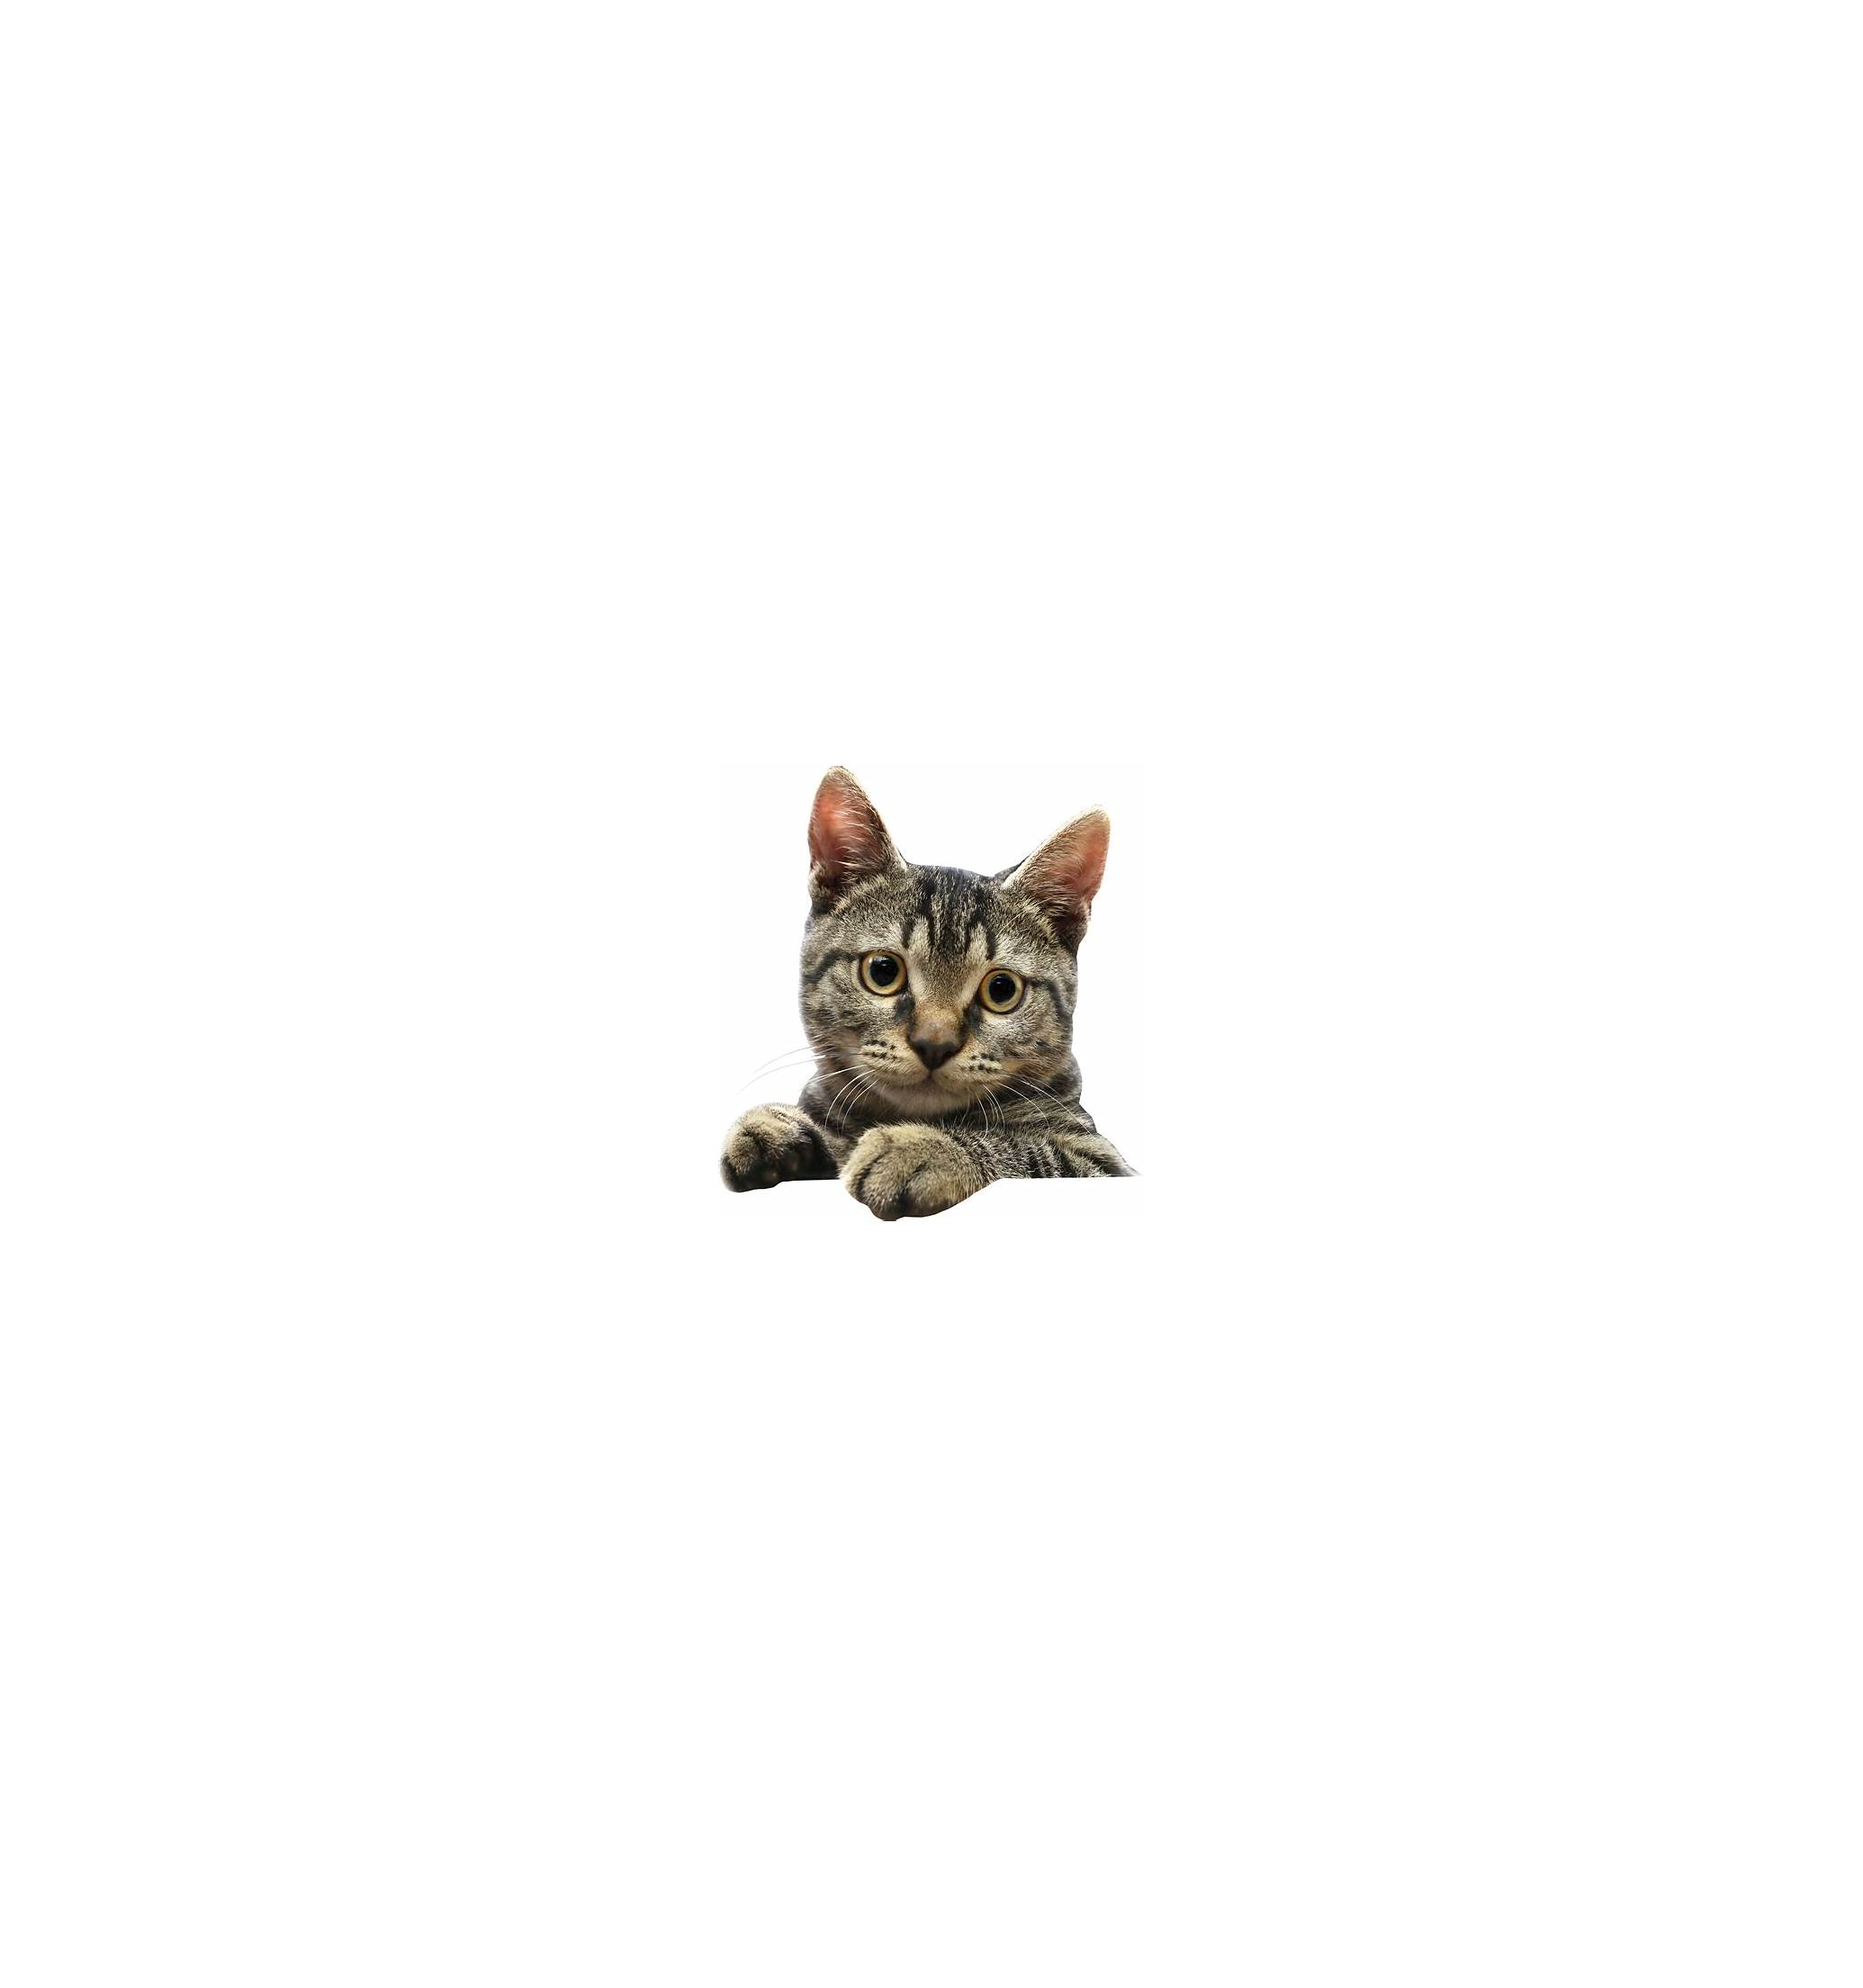

In [55]:
from google.colab.patches import cv2_imshow
#cv2.imshow() Doesn't work in colab
cv2_imshow(input)

In [56]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)


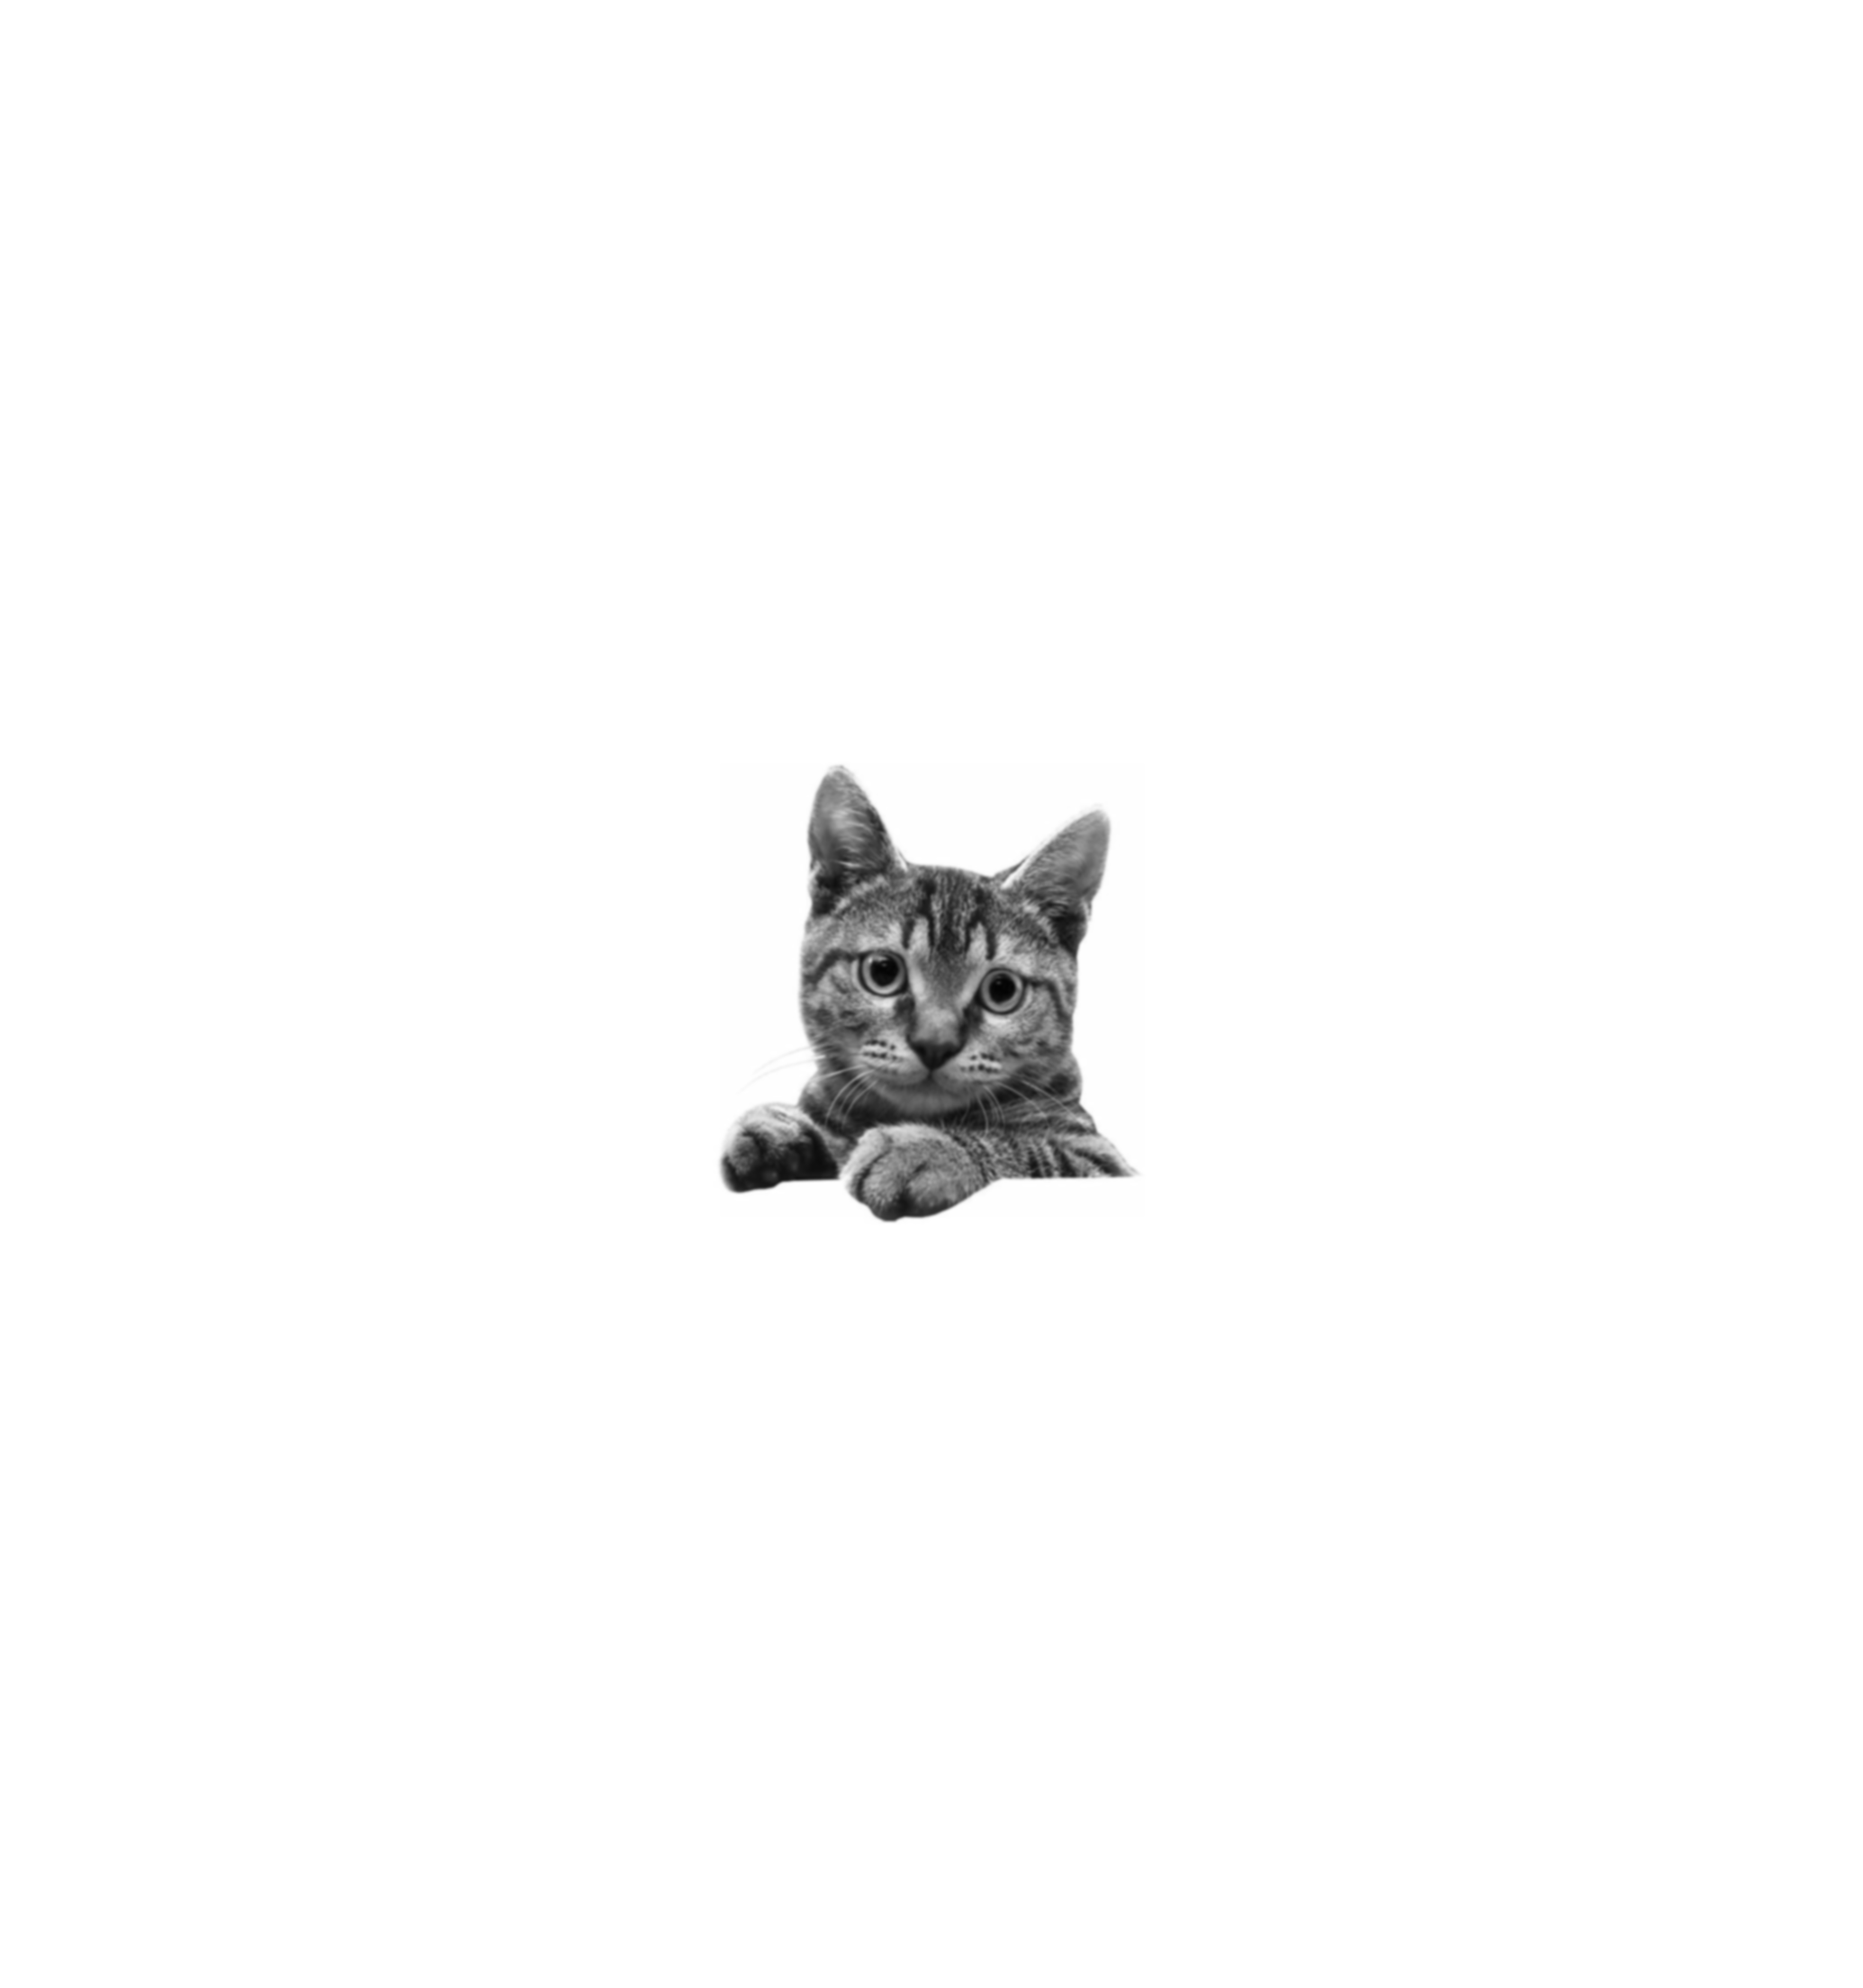

In [57]:
cv2_imshow(blurred_image)

In [58]:
height, width = blurred_image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .35), int(width * .35)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .65), int(width * .65)

# Simply use indexing to crop out the rectangle we desire
cropped = blurred_image[start_row:end_row , start_col:end_col]


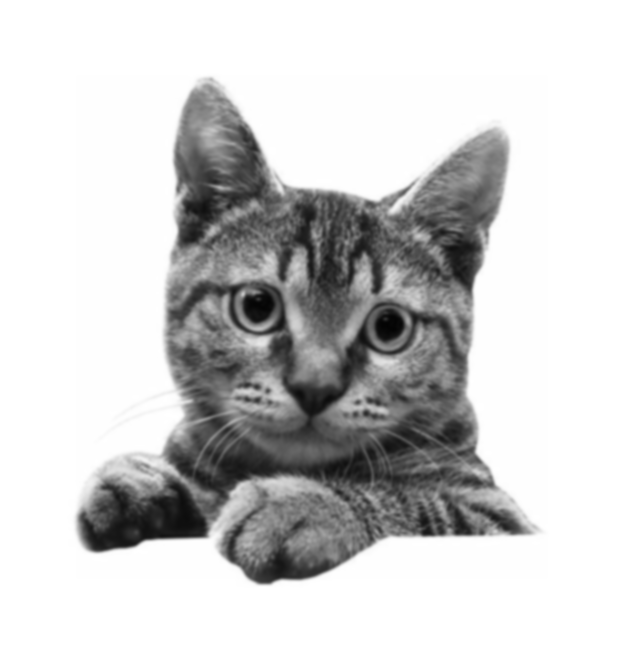

True

In [59]:
cv2_imshow(cropped)
cv2.imwrite('Red_Kitten_01.jpg', cropped)

In [60]:
# Load an image using 'imread' specifying the path to image
input = cv2.imread("/content/OIP.A9TwI-qqX5QGTRwlSq5DUwAAAA?w=456")

In [61]:
cv2.imwrite('Red_Kitten_02.jpg', input)

True

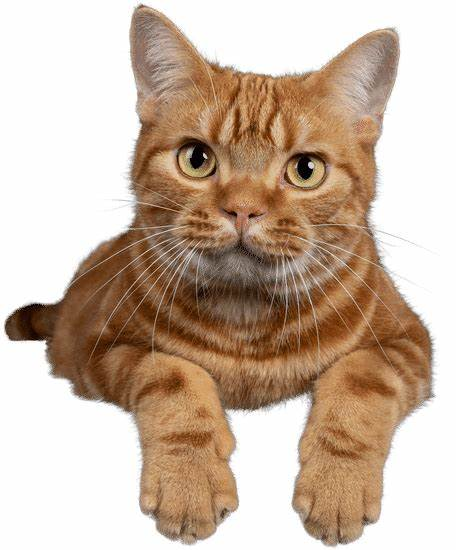

In [62]:
cv2_imshow(input)

In [63]:
def cats_aug(image_paths):
  from google.colab.patches import cv2_imshow
  import cv2
  import numpy as np

  image = cv2.imread(image_path)
  # crop image
  height, width = image.shape[:2]
  # Let's get the starting pixel coordiantes (top  left of cropping rectangle)
  start_row, start_col = int(height * .10), int(width * .10)

  # Let's get the ending pixel coordinates (bottom right)
  end_row, end_col = int(height * .50), int(width * .90)

  # Simply use indexing to crop out the rectangle we desire
  cropped = image[start_row:end_row , start_col:end_col]

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
   # Apply Gaussian blur
  blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

  # Apply edge detection
  edges = cv2.Canny(blurred_image, 100, 200)
  #Rotate the image by 45 degrees
  rows, cols, _ = image.shape
  M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
  rotated_image = cv2.warpAffine(image, M, (cols, rows))

  # Change the color of the image to green
  # Create a light, transparent green color overlay
  green_overlay = np.full_like(image, (0, 128, 0), dtype=np.uint8)
  alpha = 0.3  # Transparency factor
  overlay_image = cv2.addWeighted(image, 1 - alpha, green_overlay, alpha, 0)


  # Adjust the brightness of the green image
  # Convert the image to the HSV color space
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * 1.5, 0, 255)
  bright_green_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

  #add noise to it
  # Add Gaussian noise to the rotated image
  mean = 0
  std_dev = 20
  noise = np.random.normal(mean, std_dev, image.shape)
  noisy_image = np.clip(rotated_image + noise, 0, 255).astype(np.uint8)

  cv2_imshow(image)
  cv2_imshow(gray_image)
  cv2_imshow(cropped)
  cv2_imshow(blurred_image)
  cv2_imshow(edges)
  cv2_imshow(rotated_image)
  cv2_imshow(noisy_image)
  cv2_imshow(overlay_image)
  cv2_imshow(bright_green_image)


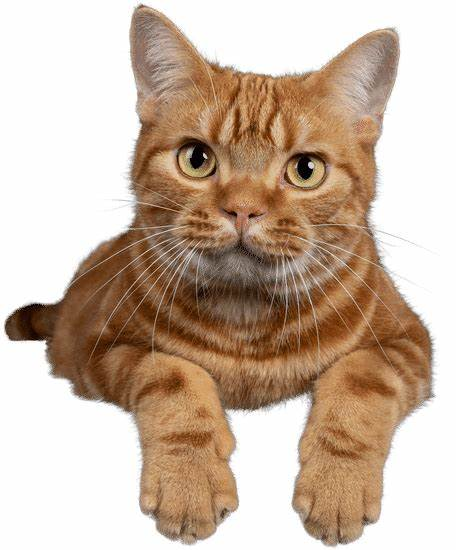

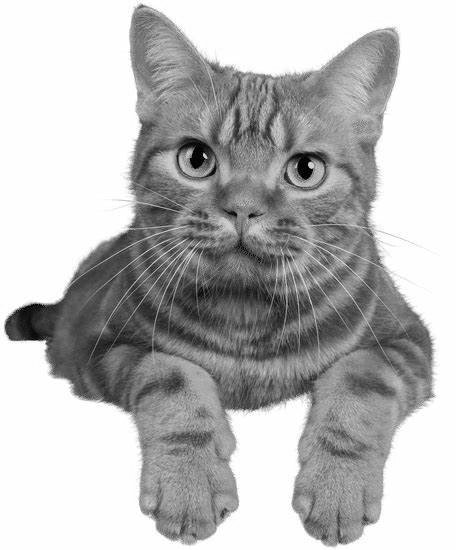

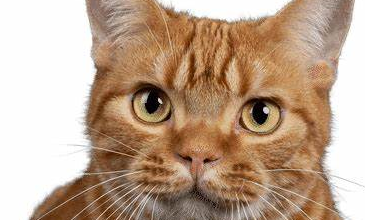

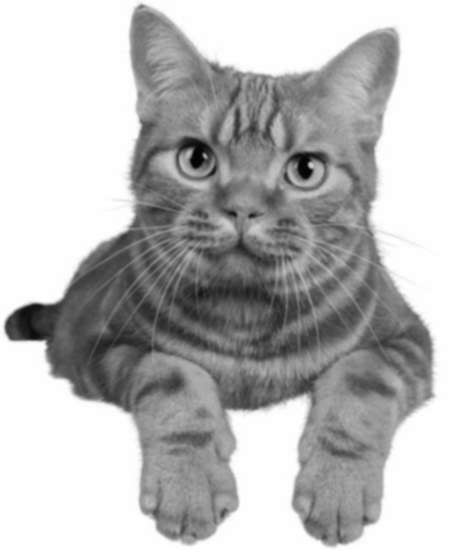

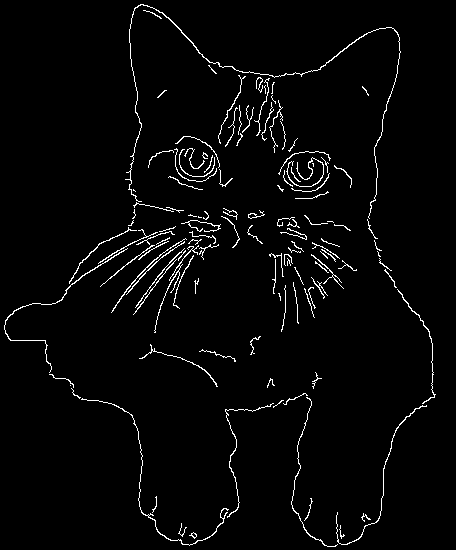

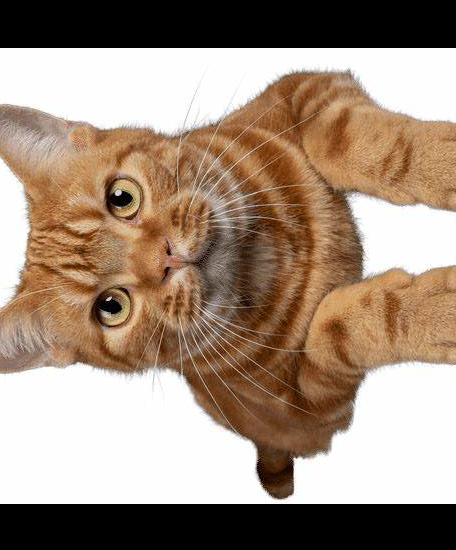

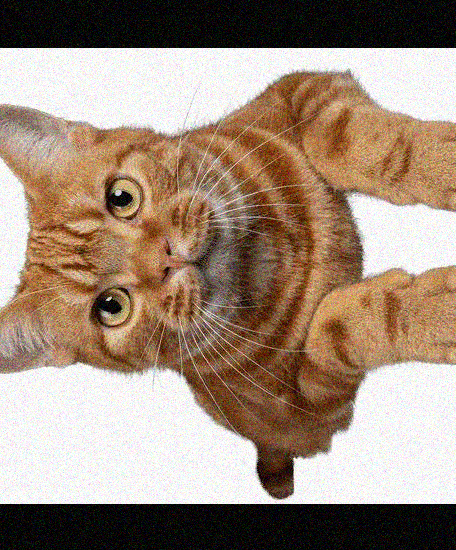

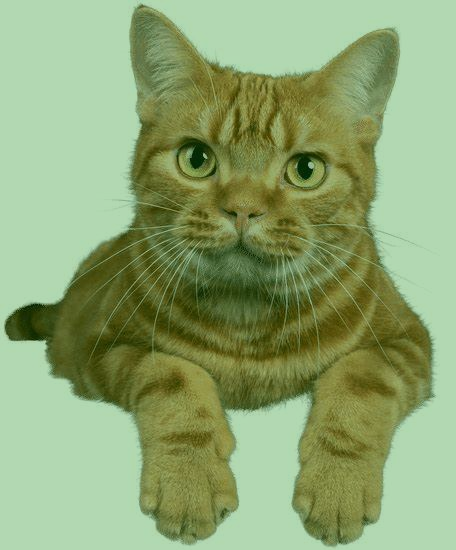

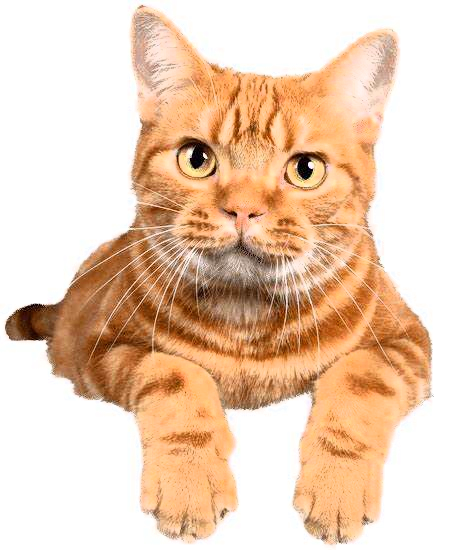

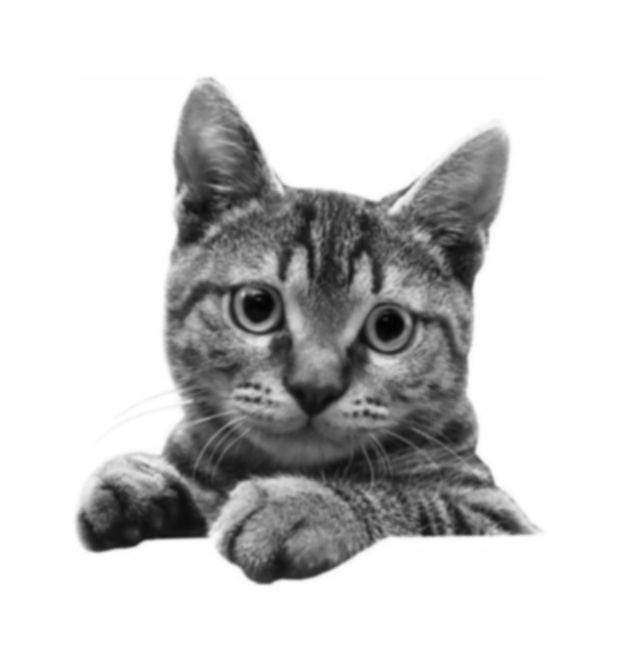

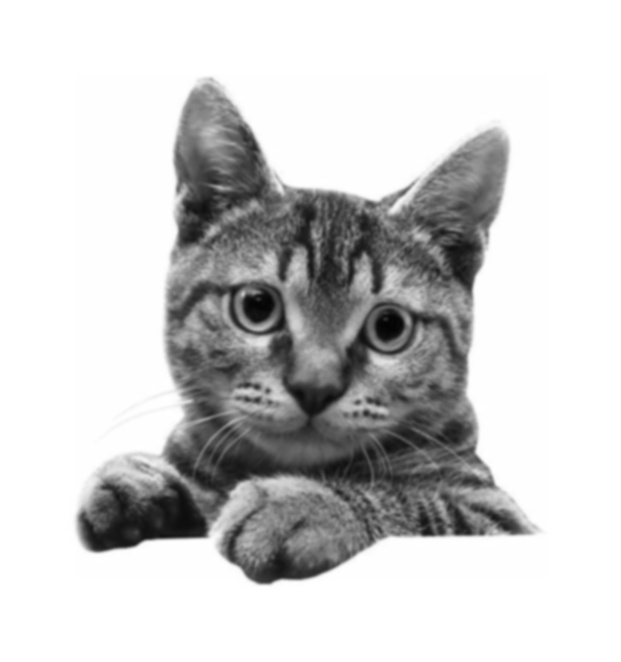

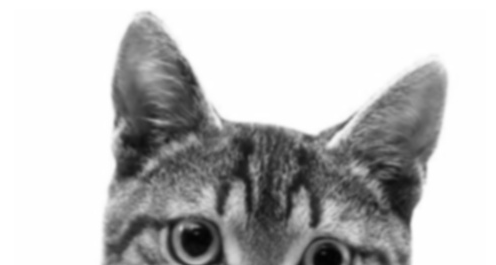

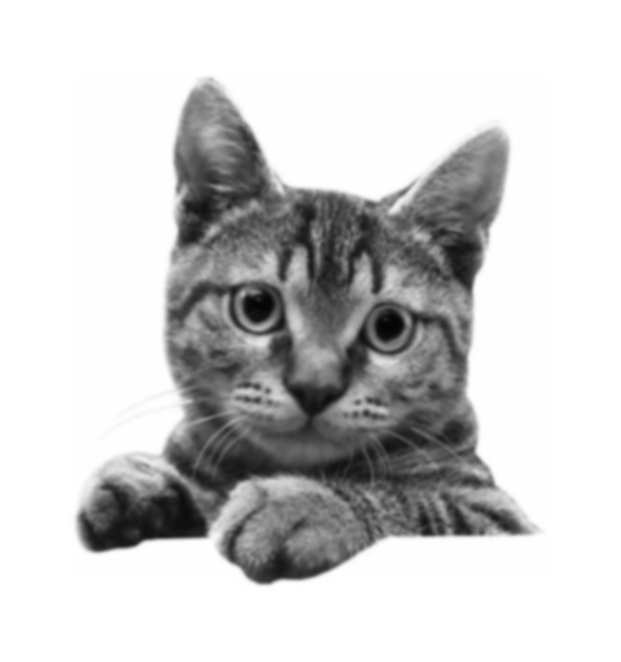

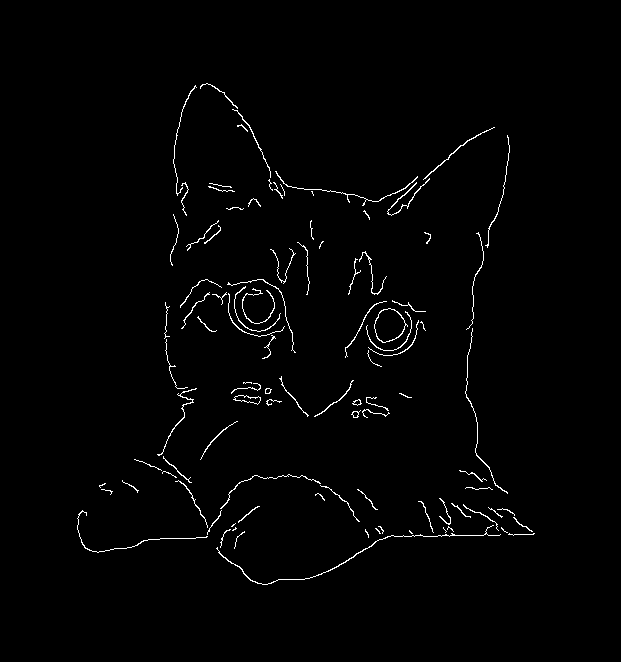

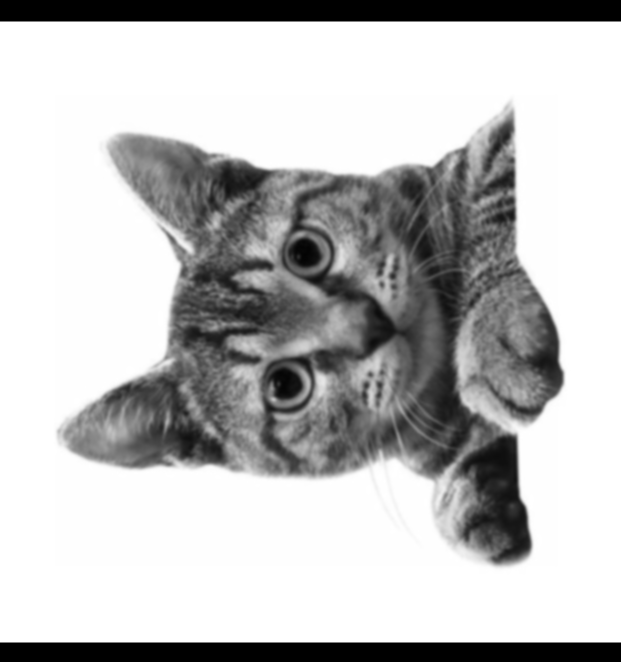

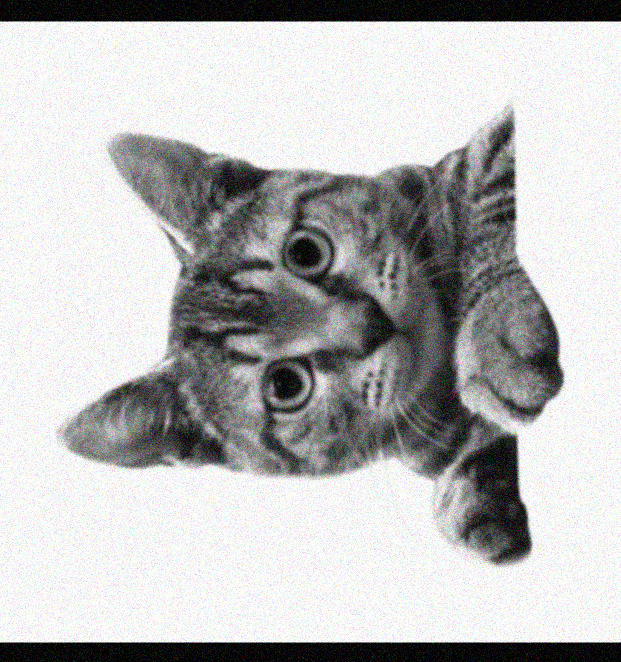

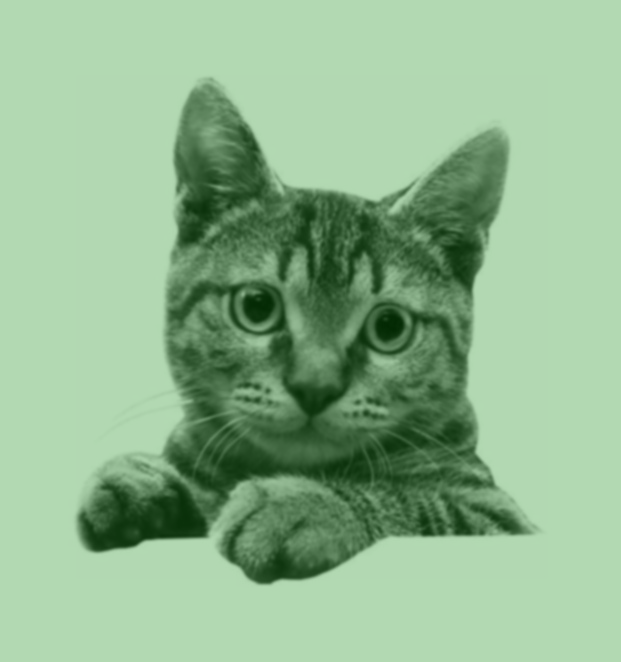

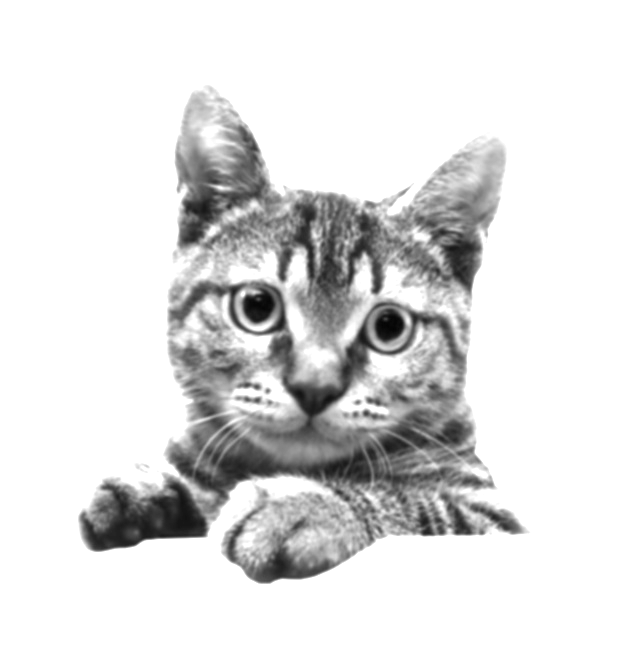

In [64]:
image_paths = ['/content/OIP.A9TwI-qqX5QGTRwlSq5DUwAAAA?w=456', '/content/Red_Kitten_01.jpg']
for image_path in image_paths:
  cats_aug(image_paths)